<p>This is a paragraph containing <b>bold text</b></p>

### Python module/package imports for this chapter

In [1]:
import os, sys, collections, re, json, io, base64

In [2]:
import numpy as np

import matplotlib
import matplotlib.pyplot as pp
import matplotlib.animation as anim
from mpl_toolkits.basemap import Basemap

%matplotlib inline

In [3]:
import requests
import bs4      # BeautifulSoup 4

In [4]:
import IPython.display
import PIL, PIL.Image, PIL.ImageOps, PIL.ImageEnhance  # Python Imaging Library - now "pillow"

### Data needed from previous videos

In [5]:
images = requests.get('http://mars.nasa.gov/msl/multimedia/raw',
                      params = {'s': '1460', 'camera': 'FHAZ'})
htmlpage = images.text

# if internet is not available or NASA's webserver is unresponsive,
# the same webpage can be found in the exercise files, and loaded with
# htmlpage = json.load(open('sol1460.json','r'))

## Parsing HTML with `BeautifulSoup`

In [6]:
soup = bs4.BeautifulSoup(htmlpage,'lxml')

In [7]:
soup

<!-- CGI.HTTP_HOST: mars.jpl.nasa.gov --><!-- [r.cn: -- /websites/cmsroot/multimedia/raw/index.cfm,/websites/mars/cmsroot/multimedia/raw/index.cfm,/websites/mars/cmsroot/multimedia/raw/test/index.cfm -- /websites/cmsroot/multimedia/raw/index.cfm] --><!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html>
<head>
<title>Raw Images - Mars Science Laboratory</title>
<meta content="Raw Images" name="title"/>
<meta content="Raw Images - Mars Science Laboratory" property="og:title"/>
<meta content="JPL, NASA" name="creator"/>
<meta content="JPL, NASA" name="author"/>
<meta content="Curiosity, raw images, multimedia, Mars Science Laboratory, Curiosity, MSL, Rover, Planet Mars" name="keywords"/>
<meta content="Mars Science Laboratory rover Curiosity exploring the planet mars - facts, information, videos and pictures" name="description"/>
<meta content="Mars Science Laboratory rover Curiosity exploring the planet mars - fac

In [8]:
print(soup.prettify())

<!-- CGI.HTTP_HOST: mars.jpl.nasa.gov -->
<!-- [r.cn: -- /websites/cmsroot/multimedia/raw/index.cfm,/websites/mars/cmsroot/multimedia/raw/index.cfm,/websites/mars/cmsroot/multimedia/raw/test/index.cfm -- /websites/cmsroot/multimedia/raw/index.cfm] -->
<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html>
 <head>
  <title>
   Raw Images - Mars Science Laboratory
  </title>
  <meta content="Raw Images" name="title"/>
  <meta content="Raw Images - Mars Science Laboratory" property="og:title"/>
  <meta content="JPL, NASA" name="creator"/>
  <meta content="JPL, NASA" name="author"/>
  <meta content="Curiosity, raw images, multimedia, Mars Science Laboratory, Curiosity, MSL, Rover, Planet Mars" name="keywords"/>
  <meta content="Mars Science Laboratory rover Curiosity exploring the planet mars - facts, information, videos and pictures" name="description"/>
  <meta content="Mars Science Laboratory rover Curiosity explo

In [9]:
soup.head

<head>
<title>Raw Images - Mars Science Laboratory</title>
<meta content="Raw Images" name="title"/>
<meta content="Raw Images - Mars Science Laboratory" property="og:title"/>
<meta content="JPL, NASA" name="creator"/>
<meta content="JPL, NASA" name="author"/>
<meta content="Curiosity, raw images, multimedia, Mars Science Laboratory, Curiosity, MSL, Rover, Planet Mars" name="keywords"/>
<meta content="Mars Science Laboratory rover Curiosity exploring the planet mars - facts, information, videos and pictures" name="description"/>
<meta content="Mars Science Laboratory rover Curiosity exploring the planet mars - facts, information, videos and pictures" property="og:description"/>
<meta content="http://mars.jpl.nasa.gov/msl/multimedia/raw/" property="og:url"/>
<meta content="24YTv3DMgPjuCosK3yyc8RX9chB0AzhIxGajBBxbwMU" name="google-site-verification"/>
<meta content="IE=9" http-equiv="X-UA-Compatible"/>
<meta content="http://mars.jpl.nasa.gov/layout/msl/images/FollowYourCuriosity.jpg" pro

In [10]:
soup.title

<title>Raw Images - Mars Science Laboratory</title>

In [11]:
type(soup.title)

bs4.element.Tag

In [12]:
soup.title.name

'title'

In [13]:
soup.title.contents

['Raw Images - Mars Science Laboratory']

In [14]:
soup.title.text

'Raw Images - Mars Science Laboratory'

In [15]:
soup.title.string

'Raw Images - Mars Science Laboratory'

In [16]:
soup.img

<img align="left" alt="Follow this link to skip to the main content" border="0" height="1" hspace="0" src="../../images/spacer.gif" vspace="0" width="1"/>

In [17]:
soup.img.attrs

{'align': 'left',
 'alt': 'Follow this link to skip to the main content',
 'border': '0',
 'height': '1',
 'hspace': '0',
 'src': '../../images/spacer.gif',
 'vspace': '0',
 'width': '1'}

In [18]:
soup.img['src'], soup.img['width']

('../../images/spacer.gif', '1')

In [19]:
soup.map.contents[:6]

['\n',
 <area alt="NASA" coords="29,29,30" href="http://www.nasa.gov/" shape="circle"></area>,
 '\n',
 <area alt="Jet Propulsion Laboratory" coords="70,5,350,32" href="http://www.jpl.nasa.gov/"></area>,
 '\n',
 <area alt="California Institute of Technology" coords="69,32,350,54" href="http://www.caltech.edu/"></area>]

In [20]:
soup.map.parent

<div align="center" id="contentBlueOuter_contentPage">
<!-- Skip navigation link -->
<a href="#maincontent"><img align="left" alt="Follow this link to skip to the main content" border="0" height="1" hspace="0" src="../../images/spacer.gif" vspace="0" width="1"/></a>
<!-- End skip navigation link -->
<map name="top_jplBanner">
<area alt="NASA" coords="29,29,30" href="http://www.nasa.gov/" shape="circle"></area>
<area alt="Jet Propulsion Laboratory" coords="70,5,350,32" href="http://www.jpl.nasa.gov/"></area>
<area alt="California Institute of Technology" coords="69,32,350,54" href="http://www.caltech.edu/"></area>
<area alt="JPL HOME" coords="507,11,567,31" href="http://www.jpl.nasa.gov/index.cfm"></area>
<area alt="EARTH" coords="576,9,620,31" href="http://www.jpl.nasa.gov/earth/"></area>
<area alt="SOLAR SYSTEM" coords="630,9,720,31" href="http://www.jpl.nasa.gov/solar-system/"></area>
<area alt="STARS &amp; GALAXIES" coords="730,10,836,31" href="http://www.jpl.nasa.gov/stars-galaxies

In [21]:
for p in soup.map.parents:
    print(p.name)

div
div
div
body
html
[document]


In [22]:
soup.find_all('img')

[<img align="left" alt="Follow this link to skip to the main content" border="0" height="1" hspace="0" src="../../images/spacer.gif" vspace="0" width="1"/>,
 <img alt="JPL Banner" border="0" height="67" src="../../layout/msl/images/top_jplBanner.png" usemap="#top_jplBanner" width="978"/>,
 <img alt="Mars Science Laboratory" border="0" height="90" src="../../layout/msl/images/spacer.gif" title="Mars Science Laboratory" width="1000"/>,
 <img alt="Home" border="0" height="34" id="nav_home" src="../../layout/msl/images/navtop_home.png" style="_margin-top:-2px;" title="Home" width="111"/>,
 <img alt="Mission" border="0" height="34" id="nav_mission" onmouseout="changeImages('nav_mission', '../../layout/msl/images/navtop_mission.png');" onmouseover="changeImages('nav_mission', '../../layout/msl/images/navtop_mission_sel.png');" src="../../layout/msl/images/navtop_mission.png" title="Mission" width="132"/>,
 <img alt="Mission" border="0" height="34" id="nav_mission" src="../../layout/msl/image

In [23]:
imgs = [img['src'] for img in soup.find_all('img') if 'Image' in img['alt']]

In [24]:
imgs

['http://mars.jpl.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/01460/opgs/edr/fcam/FRB_527107895EDR_F0572798FHAZ00337M_-thm.jpg',
 'http://mars.jpl.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/01460/opgs/edr/fcam/FLB_527107895EDR_F0572798FHAZ00337M_-thm.jpg',
 'http://mars.jpl.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/01460/opgs/edr/fcam/FLB_527097236EDR_F0572798FHAZ00206M_-thm.jpg',
 'http://mars.jpl.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/01460/opgs/edr/fcam/FRB_527097236EDR_F0572798FHAZ00206M_-thm.jpg',
 'http://mars.jpl.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/01460/opgs/edr/fcam/FLB_527096813EDR_F0572798FHAZ00206M_-thm.jpg',
 'http://mars.jpl.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/01460/opgs/edr/fcam/FRB_527096813EDR_F0572798FHAZ00206M_-thm.jpg',
 'http://mars.jpl.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/01460/opgs/edr/fcam/FLB_527107895EDR_T0572798FHAZ00337M_-thm.jpg',
 'http://mars

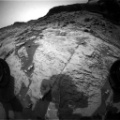

In [25]:
IPython.display.Image(imgs[0])

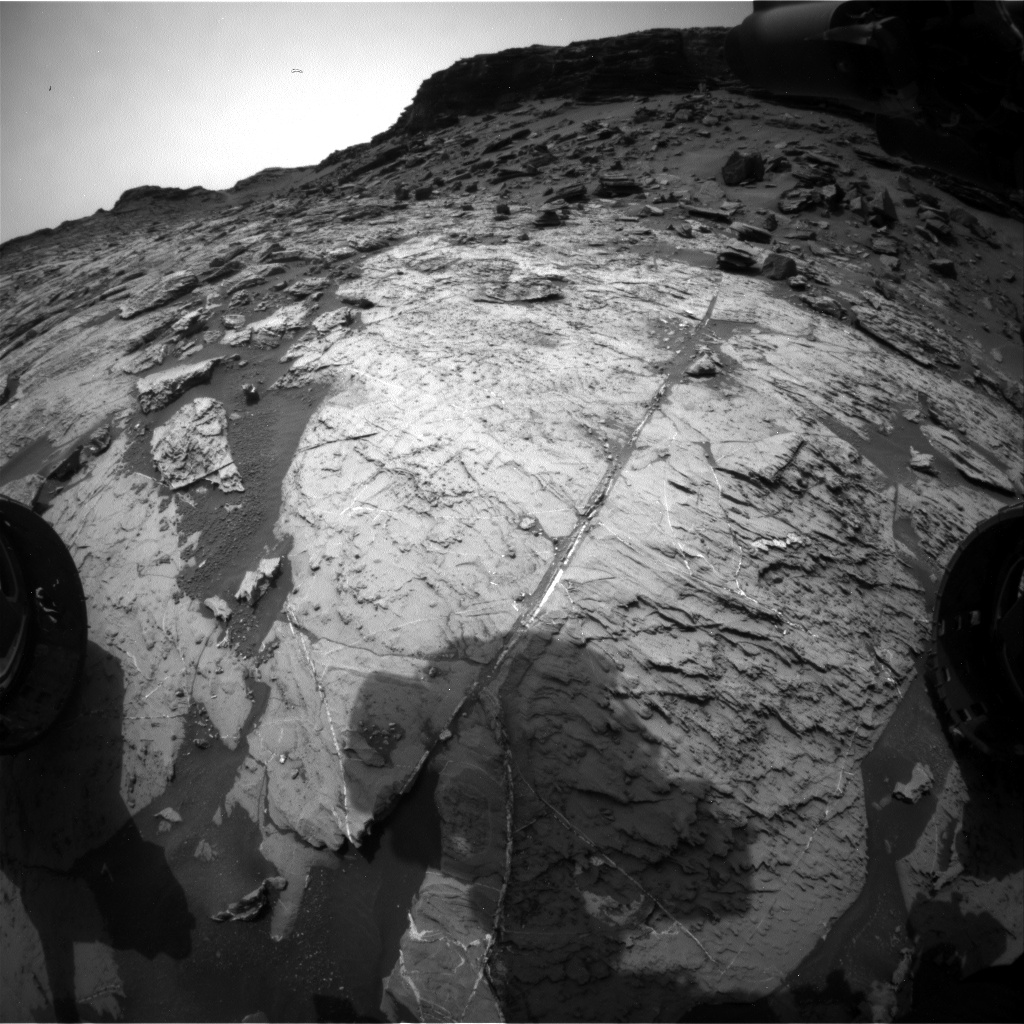

In [27]:
IPython.display.Image(re.sub('-thm','',imgs[0]))